In [1]:
import requests
import pandas as pd

page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
page

<Response [200]>

In [2]:
print(page.content)

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


In [3]:
page.text.split("\n")

['<!DOCTYPE html>',
 '<html>',
 '    <head>',
 '        <title>A simple example page</title>',
 '    </head>',
 '    <body>',
 '        <p>Here is some simple content for this page.</p>',
 '    </body>',
 '</html>']

In [4]:
# Attempt to read from a file
try:
    with open('example.txt', 'r') as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    # If the file does not exist, create it and write a default message
    with open('example.txt', 'w') as file:
        file.write("This is a new file.")
        print("File 'example.txt' was not found and has been created.")

File 'example.txt' was not found and has been created.


In [5]:
with open('example.txt', 'r') as file:
    content = file.read()
    print(content)

This is a new file.


In [6]:
import json 

data = [
    {
        "name": "Alice Brown",
        "department": "Marketing",
        "salary": 70000
    },
    {
        "name": "Bob Smith",
        "department": "Sales",
        "salary": 65000
    },
    {
        "name": "Carol Jones",
        "department": "IT",
        "salary": 75000
    }
]

#write this variable inside a json file
with open('output.json', 'w') as file:
    json.dump(data, file, indent=4)

In [7]:
#then read the data
with open('output.json', 'r') as file:
    data = json.load(file)
    print(data)

[{'name': 'Alice Brown', 'department': 'Marketing', 'salary': 70000}, {'name': 'Bob Smith', 'department': 'Sales', 'salary': 65000}, {'name': 'Carol Jones', 'department': 'IT', 'salary': 75000}]


In [8]:
import time
import requests
import csv
from io import StringIO

In [9]:
%time
def csv_reader(file_content):
    return csv.reader(StringIO(file_content))

# Fetch the file content from the URL
url = 'https://gist.githubusercontent.com/bdallard/d4a3e247e8a739a329fd518c0860f8a8/raw/82fb43adc5ce022797a5df21eb06dd8e755145ea/data-json.csv'
response = requests.get(url)
file_content = response.text

tmp=0
start_time = time.time()
csv_data = csv_reader(file_content)
for row in csv_data:
    tmp+=int(row[0][-1]) #some dummy operation
end_time = time.time()

print("Traditional approach took:", end_time - start_time, "seconds")

CPU times: total: 0 ns
Wall time: 0 ns
Traditional approach took: 0.0 seconds


In [10]:
%time
def csv_reader(file_content):
    return csv.reader(StringIO(file_content))

# Fetch the file content from the URL
url = 'https://gist.githubusercontent.com/bdallard/d4a3e247e8a739a329fd518c0860f8a8/raw/82fb43adc5ce022797a5df21eb06dd8e755145ea/data-json.csv'
response = requests.get(url)
file_content = response.text

tmp=0
start_time = time.time()
csv_data = csv_reader(file_content)
for row in csv_data:
    tmp+=int(row[0][-1]) #some dummy operation
end_time = time.time()

print("Traditional approach took:", end_time - start_time, "seconds")

CPU times: total: 0 ns
Wall time: 0 ns
Traditional approach took: 0.008526325225830078 seconds


In [11]:
%time
def csv_reader_gen(file_content):
    for row in csv.reader(StringIO(file_content)):
        yield row

# Fetch the file content from the URL
url = "https://gist.githubusercontent.com/bdallard/d4a3e247e8a739a329fd518c0860f8a8/raw/82fb43adc5ce022797a5df21eb06dd8e755145ea/data-json.csv"
response = requests.get(url)
file_content = response.text

tmp=0
start_time = time.time()
csv_gen = csv_reader_gen(file_content)
for row in csv_gen:
    tmp+=int(row[0][-1]) #some dummy operation
end_time = time.time()

print("Generator approach took:", end_time - start_time, "seconds")

CPU times: total: 0 ns
Wall time: 0 ns
Generator approach took: 0.01563239097595215 seconds


In [12]:
response = requests.get('http://httpbin.org/ip')

In [13]:
response = requests.get('http://httpbin.org/ip') 
print(response.json()['origin'])

194.13.64.35


In [14]:
pip install free-proxy


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for free-proxy: filename=free_proxy-1.1.1-py3-none-any.whl size=5663 sha256=e2278049ee3f01516cb732bd1542b235ca0bb7da8df328a04e58e1bcb30c52c6
  Stored in directory: c:\users\mhame\appdata\local\pip\cache\wheels\c6\7f\3f\b764995ae2502d8642977764577198043d3b6c6738534f5ffe
Successfully built free-proxy


In [15]:
from fp.fp import FreeProxy
import requests
from bs4 import BeautifulSoup

In [1]:
proxy = FreeProxy(country_id=['FR']).get(); proxy

NameError: name 'FreeProxy' is not defined

In [2]:
from fp.fp import FreeProxy
import requests
from bs4 import BeautifulSoup

In [3]:
proxy = FreeProxy(country_id=['FR']).get(); proxy

FreeProxyException: Request to https://www.sslproxies.org failed

In [4]:
proxy_list = [FreeProxy(country_id=['FR']).get() for x in range(3)]; proxy_list

FreeProxyException: Request to https://www.sslproxies.org failed

In [5]:
requests.packages.urllib3.disable_warnings()
proxy = FreeProxy(country_id=['FR']).get(); 
proxy

FreeProxyException: Request to https://www.sslproxies.org failed

In [6]:
from fp.fp import FreeProxy

In [7]:
requests.packages.urllib3.disable_warnings()
proxy = FreeProxy(country_id=['FR']).get(); 
proxy

FreeProxyException: Request to https://www.sslproxies.org failed

In [8]:
proxy = FreeProxy(country_id=['FR']).get(); 
proxy

'http://51.89.14.70:80'

In [9]:
proxy_list = [FreeProxy(country_id=['FR']).get() for x in range(3)]; proxy_list

['http://66.45.246.194:8888',
 'http://66.45.246.194:8888',
 'http://51.89.14.70:80']

In [10]:
proxy_list = [FreeProxy(country_id=['FR']).get() for x in range(3)]; proxy_list

['http://143.198.226.25:80',
 'http://51.89.14.70:80',
 'http://66.45.246.194:8888']

In [11]:
proxies = {'http': proxy_list[1]} 
response = requests.get('http://httpbin.org/ip', proxies=proxies) 
print(response.json()['origin']) # our proxy !!

51.89.14.70


In [12]:
response = requests.get('http://httpbin.org/headers') 
print(response.json()['headers'])

{'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate, br, zstd', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.31.0', 'X-Amzn-Trace-Id': 'Root=1-66014fe3-00f1d05005776ae3355d2841'}


In [13]:
!curl http://httpbin.org/headers

{
  "headers": {
    "Accept": "*/*", 
    "Host": "httpbin.org", 
    "User-Agent": "curl/8.5.0", 
    "X-Amzn-Trace-Id": "Root=1-66014ff8-7c4c2a863cb656ed7a92086c"
  }
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   172  100   172    0     0    540      0 --:--:-- --:--:-- --:--:--   540


In [14]:
headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36"} 
response = requests.get('http://httpbin.org/headers', headers=headers) 
print(response.json()['headers']['User-Agent'])

Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36


In [15]:
import random
user_agents = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
    'Mozilla/5.0 (iPhone; CPU iPhone OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148',
    'Mozilla/5.0 (Linux; Android 11; SM-G960U) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.72 Mobile Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0',
    'Mozilla/5.0 (iPad; CPU OS 13_5 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Mobile/15E148 Safari/604.1',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/604.1.34 (KHTML, like Gecko) Edge/90.0.818.56',
    'Mozilla/5.0 (Linux; Android 10; SM-A505FN) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Mobile Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.3 Safari/605.1.15',
    'Mozilla/5.0 (Linux; Android 11; Pixel 3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Mobile Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Mobile/15E148 Safari/604.1',
    'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0'
]

user_agent = random.choice(user_agents) 
headers = {'User-Agent': user_agent} 
response = requests.get('https://httpbin.org/headers', headers=headers) 
print(response.json()['headers']['User-Agent']) 

Mozilla/5.0 (iPhone; CPU iPhone OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148


In [16]:
headers_list = [
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.9",
        "Host": "httpbin.org",
        "Sec-Ch-Ua": "\"Chromium\";v=\"92\", \" Not A;Brand\";v=\"99\", \"Google Chrome\";v=\"92\"",
        "Sec-Ch-Ua-Mobile": "?0",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    },
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.5",
        "Host": "httpbin.org",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:90.0) Gecko/20100101 Firefox/90.0"
    },
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.5",
        "Host": "httpbin.org",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Mobile/15E148 Safari/604.1"
    },
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-GB,en;q=0.5",
        "Host": "httpbin.org",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:54.0) Gecko/20100101 Firefox/54.0"
    },
    {
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.9",
        "Host": "httpbin.org",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Safari/605.1.15"
    }
]

headers = random.choice(headers_list) 
response = requests.get('https://httpbin.org/headers', headers=headers, proxies=proxies) 
print(response.json()['headers'])

{'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8', 'Accept-Encoding': 'gzip, deflate, br', 'Accept-Language': 'en-US,en;q=0.5', 'Host': 'httpbin.org', 'Sec-Fetch-Dest': 'document', 'Sec-Fetch-Mode': 'navigate', 'Sec-Fetch-Site': 'none', 'Sec-Fetch-User': '?1', 'Upgrade-Insecure-Requests': '1', 'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:90.0) Gecko/20100101 Firefox/90.0', 'X-Amzn-Trace-Id': 'Root=1-6601507c-4529e78d66144feb32ee6245'}


In [6]:
import requests
from bs4 import BeautifulSoup

page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")

soup = BeautifulSoup(page.content, 'html.parser')

In [8]:
soup

<!DOCTYPE html>

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>

In [10]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>



In [12]:
soup.find('p')

<p>Here is some simple content for this page.</p>

In [14]:
soup.find('p').get_text()

'Here is some simple content for this page.'

In [17]:
soup.find('p').get_text().strip()

'Here is some simple content for this page.'

In [19]:
soup.find_all('p')[0].get_text()

'Here is some simple content for this page.'

In [21]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content)
soup.find_all('p')

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>,
 <p class="inner-text">
                 Second paragraph.
             </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

In [23]:
print(soup.prettify())

<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    First paragraph.
   </p>
   <p class="inner-text">
    Second paragraph.
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    First outer paragraph.
   </b>
  </p>
  <p class="outer-text">
   <b>
    Second outer paragraph.
   </b>
  </p>
 </body>
</html>



In [25]:
soup.find_all('p', {"class":"outer-text"})[0].get_text().strip()

'First outer paragraph.'

In [27]:
soup.find_all('p', {"class":"outer-text", "id":"second"})[0].get_text().strip()

'First outer paragraph.'

In [29]:
soup.find(id="first")

<p class="inner-text first-item" id="first">
                First paragraph.
            </p>

In [31]:
wikipedia_DS_url = "https://fr.wikipedia.org/wiki/Science_des_donn%C3%A9es"
wiki_raw = requests.get(wikipedia_DS_url)
soup = BeautifulSoup(wiki_raw.content)
str(soup)[:1000]

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="fr">\n<head>\n<meta charset="utf-8"/>\n<title>Science des données — Wikipédia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-dis

In [34]:
main_soup = soup.find("main")
str(main_soup)[:1000]

'<main class="mw-body" id="content" role="main">\n<header class="mw-body-header vector-page-titlebar">\n<nav aria-label="Sommaire" class="vector-toc-landmark" role="navigation">\n<div class="vector-dropdown vector-page-titlebar-toc vector-button-flush-left" id="vector-page-titlebar-toc">\n<input aria-haspopup="true" aria-label="Basculer la table des matières" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-page-titlebar-toc" id="vector-page-titlebar-toc-checkbox" role="button" type="checkbox"/>\n<label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet cdx-button--icon-only" for="vector-page-titlebar-toc-checkbox" id="vector-page-titlebar-toc-label"><span class="vector-icon mw-ui-icon-listBullet mw-ui-icon-wikimedia-listBullet"></span>\n<span class="vector-dropdown-label-text">Basculer la table des matières</span>\n</label>\n<div class="vector-dropdown-content">\n<div class="v

In [36]:
print(main_soup.prettify())

<main class="mw-body" id="content" role="main">
 <header class="mw-body-header vector-page-titlebar">
  <nav aria-label="Sommaire" class="vector-toc-landmark" role="navigation">
   <div class="vector-dropdown vector-page-titlebar-toc vector-button-flush-left" id="vector-page-titlebar-toc">
    <input aria-haspopup="true" aria-label="Basculer la table des matières" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-page-titlebar-toc" id="vector-page-titlebar-toc-checkbox" role="button" type="checkbox"/>
    <label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet cdx-button--icon-only" for="vector-page-titlebar-toc-checkbox" id="vector-page-titlebar-toc-label">
     <span class="vector-icon mw-ui-icon-listBullet mw-ui-icon-wikimedia-listBullet">
     </span>
     <span class="vector-dropdown-label-text">
      Basculer la table des matières
     </span>
    </label>
    <div clas

In [38]:
links = main_soup.find_all("a")

In [40]:
links = main_soup.find_all("a", href=True, title=True)
links[:10]

[<a class="interlanguage-link-target" href="https://ar.wikipedia.org/wiki/%D8%B9%D9%84%D9%85_%D8%A7%D9%84%D8%A8%D9%8A%D8%A7%D9%86%D8%A7%D8%AA" hreflang="ar" lang="ar" title="علم البيانات – arabe"><span>العربية</span></a>,
 <a class="interlanguage-link-target" href="https://az.wikipedia.org/wiki/Veril%C9%99nl%C9%99r_elmi" hreflang="az" lang="az" title="Verilənlər elmi – azerbaïdjanais"><span>Azərbaycanca</span></a>,
 <a class="interlanguage-link-target" href="https://bg.wikipedia.org/wiki/%D0%9D%D0%B0%D1%83%D0%BA%D0%B0_%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D0%B8%D1%82%D0%B5" hreflang="bg" lang="bg" title="Наука за данните – bulgare"><span>Български</span></a>,
 <a class="interlanguage-link-target" href="https://bn.wikipedia.org/wiki/%E0%A6%89%E0%A6%AA%E0%A6%BE%E0%A6%A4%E0%A7%8D%E0%A6%A4_%E0%A6%AC%E0%A6%BF%E0%A6%9C%E0%A7%8D%E0%A6%9E%E0%A6%BE%E0%A6%A8" hreflang="bn" lang="bn" title="উপাত্ত বিজ্ঞান – bengali"><span>বাংলা</span></a>,
 <a class="interlanguage-link-target" href="https://ca.wi

In [42]:
'Bonjour'.startswith("a")

False

In [45]:
links = main_soup.find_all("a", href=lambda link: link and link.startswith("/wiki/"), title=True)
print(links[:5])

[<a accesskey="c" href="/wiki/Science_des_donn%C3%A9es" title="Voir le contenu de la page [c]"><span>Article</span></a>, <a accesskey="t" href="/wiki/Discussion:Science_des_donn%C3%A9es" rel="discussion" title="Discussion au sujet de cette page de contenu [t]"><span>Discussion</span></a>, <a accesskey="j" href="/wiki/Sp%C3%A9cial:Pages_li%C3%A9es/Science_des_donn%C3%A9es" title="Liste des pages liées qui pointent sur celle-ci [j]"><span>Pages liées</span></a>, <a accesskey="k" href="/wiki/Sp%C3%A9cial:Suivi_des_liens/Science_des_donn%C3%A9es" rel="nofollow" title="Liste des modifications récentes des pages appelées par celle-ci [k]"><span>Suivi des pages liées</span></a>, <a accesskey="u" href="/wiki/Aide:Importer_un_fichier" title="Téléverser des fichiers [u]"><span>Téléverser un fichier</span></a>]


In [48]:
liens = []
for l in links:
    liens.append(l['href'])
    
liens[:5]

['/wiki/Science_des_donn%C3%A9es',
 '/wiki/Discussion:Science_des_donn%C3%A9es',
 '/wiki/Sp%C3%A9cial:Pages_li%C3%A9es/Science_des_donn%C3%A9es',
 '/wiki/Sp%C3%A9cial:Suivi_des_liens/Science_des_donn%C3%A9es',
 '/wiki/Aide:Importer_un_fichier']

In [50]:
from urllib.parse import unquote

decoded_urls = [unquote(url) for url in liens]

for i,url in enumerate(decoded_urls):
    print(url)
    if i==4: break

/wiki/Science_des_données
/wiki/Discussion:Science_des_données
/wiki/Spécial:Pages_liées/Science_des_données
/wiki/Spécial:Suivi_des_liens/Science_des_données
/wiki/Aide:Importer_un_fichier


In [52]:
links[0]['href']

'/wiki/Science_des_donn%C3%A9es'

In [54]:
list_of_article_links = [ link["href"] for link in links ]
list_of_article_links = [unquote(url) for url in list_of_article_links]; list_of_article_links[:10]

['/wiki/Science_des_données',
 '/wiki/Discussion:Science_des_données',
 '/wiki/Spécial:Pages_liées/Science_des_données',
 '/wiki/Spécial:Suivi_des_liens/Science_des_données',
 '/wiki/Aide:Importer_un_fichier',
 '/wiki/Spécial:Pages_spéciales',
 '/wiki/Science',
 '/wiki/Architecte_de_données',
 '/wiki/Donnée',
 '/wiki/Modèle:Infobox_Discipline']

In [56]:
example_url = list_of_article_links[0]
requests.get(example_url).content

MissingSchema: Invalid URL '/wiki/Science_des_données': No scheme supplied. Perhaps you meant https:///wiki/Science_des_données?

In [58]:
prefix = "https://fr.wikipedia.org"
prefix + list_of_article_links[0]

'https://fr.wikipedia.org/wiki/Science_des_données'

In [60]:
first_article_content = requests.get(prefix + list_of_article_links[0]).content
first_article_content[:1000]

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Science des donn\xc3\xa9es \xe2\x80\x94 Wikip\xc3\xa9dia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-fea

In [65]:
list_article_links_complete = [prefix + extension for extension in list_of_article_links]
list_article_links_complete[:10]

['https://fr.wikipedia.org/wiki/Science_des_données',
 'https://fr.wikipedia.org/wiki/Discussion:Science_des_données',
 'https://fr.wikipedia.org/wiki/Spécial:Pages_liées/Science_des_données',
 'https://fr.wikipedia.org/wiki/Spécial:Suivi_des_liens/Science_des_données',
 'https://fr.wikipedia.org/wiki/Aide:Importer_un_fichier',
 'https://fr.wikipedia.org/wiki/Spécial:Pages_spéciales',
 'https://fr.wikipedia.org/wiki/Science',
 'https://fr.wikipedia.org/wiki/Architecte_de_données',
 'https://fr.wikipedia.org/wiki/Donnée',
 'https://fr.wikipedia.org/wiki/Modèle:Infobox_Discipline']

In [66]:
pd.DataFrame(list_article_links_complete, columns=['liens'])

NameError: name 'pd' is not defined

In [69]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd

pd.DataFrame(list_article_links_complete, columns=['liens'])

,liens
0,https://fr.wikipedia.org/wiki/Science_des_données
1,https://fr.wikipedia.org/wiki/Discussion:Scien...
2,https://fr.wikipedia.org/wiki/Spécial:Pages_li...
3,https://fr.wikipedia.org/wiki/Spécial:Suivi_de...
4,https://fr.wikipedia.org/wiki/Aide:Importer_un...
...,...
328,https://fr.wikipedia.org/wiki/Catégorie:Portai...
329,https://fr.wikipedia.org/wiki/Catégorie:Portai...
330,https://fr.wikipedia.org/wiki/Catégorie:Projet...
331,https://fr.wikipedia.org/wiki/Catégorie:Portai...


In [73]:
from tqdm.notebook import tqdm # pour afficher des barres de chargement
import numpy as np # pour calculer des médianes

In [75]:
articles_number_notes = []

for article_link in tqdm(list_article_links_complete[:50]): # intégrer tdqm permet d'afficher une barre de progression de la boucle

    # constitution de notre soup de façon classique
    first_article_content = requests.get(article_link).content
    first_article_soup = BeautifulSoup(first_article_content, 'html.parser')

    # Certains articles n'auront ni notes ni références, ils donneront une erreur
    # Ces erreurs seront gérés par la commande except
    try:

        # On parcourt l'arbre pour trouver les éléments dans la liste référence
        notes_et_references = (first_article_soup
                               .find('main')
                               .find("ol", {"class": "references"})
                               .find_all("li")
                              )
        # on stocke dans une liste le nombre de références
        number_of_notes = len(notes_et_references)
        articles_number_notes.append(number_of_notes)

    except AttributeError:
        print("No note or reference in article", article_link)
        articles_number_notes.append(0)   # Il n'y a pas de notes donc on ajoute 0 à la liste.

print("\nMedian number of notes per article is", np.median(articles_number_notes))
print("Mean number of notes per article is", np.mean(articles_number_notes))
print("Stdev of number of notes per article is", np.std(articles_number_notes))

  0%|          | 0/50 [00:00<?, ?it/s]

No note or reference in article https://fr.wikipedia.org/wiki/Discussion:Science_des_données
No note or reference in article https://fr.wikipedia.org/wiki/Spécial:Pages_liées/Science_des_données
No note or reference in article https://fr.wikipedia.org/wiki/Spécial:Suivi_des_liens/Science_des_données
No note or reference in article https://fr.wikipedia.org/wiki/Aide:Importer_un_fichier
No note or reference in article https://fr.wikipedia.org/wiki/Spécial:Pages_spéciales
No note or reference in article https://fr.wikipedia.org/wiki/Architecte_de_données
No note or reference in article https://fr.wikipedia.org/wiki/Modèle:Infobox_Discipline
No note or reference in article https://fr.wikipedia.org/wiki/Tableau_de_bord_(informatique)
No note or reference in article https://fr.wikipedia.org/wiki/Aide:Recyclage
No note or reference in article https://fr.wikipedia.org/wiki/Spécial:EditPage/Science_des_données
No note or reference in article https://fr.wikipedia.org/wiki/Discussion:Science_des_

{'whiskers': [<matplotlib.lines.Line2D at 0x22ea5a5f2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22ea57322d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x22ea49fbc50>],
 'medians': [<matplotlib.lines.Line2D at 0x22ea5db50d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22ea5db5ad0>],
 'means': []}

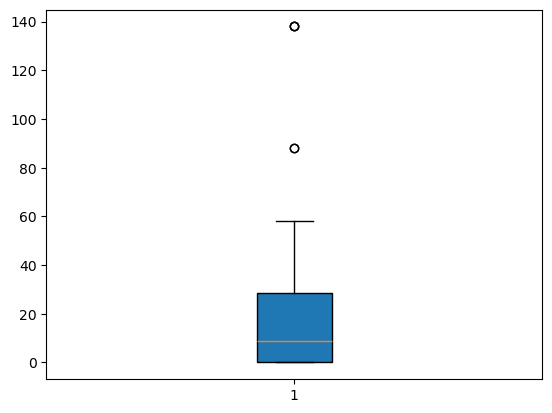

In [77]:
import matplotlib.pyplot as plt

plt.boxplot(articles_number_notes, patch_artist=True)

In [ ]:
import seaborn as sns
plt.figure(figsize=(4,5))
sns.violinplot(data=articles_number_notes)